In [ ]:
#%% Basic imports
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import scipy as sp
import os

In [4]:
%matplotlib inline

# Guide to figure and axes manipulation - _BEGINNER_

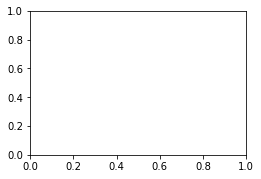

In [5]:
# build figure canvas - object oriented
figsize = (3,2) # width x height
fig = plt.figure(figsize=figsize)

# add axes within figure
ax = fig.add_axes([0,0,1,1]) # [left, bottom, width, height]

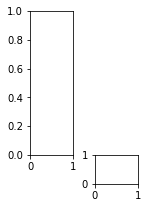

In [6]:
# add specific dimension of axes
# remove the previous ax and make it again
ax.remove()

# [left, bottom, width, height], relative units
# left and bottom are the x,y coordinates in the left,bottom corner of the axes. 
# width and height are the lengths spanning the axes
ax = fig.add_axes([0.2,0.2,0.2,1]) 
ax2 = fig.add_axes([0.5,0, 0.2, 0.2])

# note that adding with a subplot pads the borders of the axes
# need to call fig again to show the plot... again
fig 

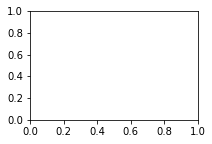

In [7]:
# add axes using subplot
# remove the previous ax and make it again
ax.remove(); ax2.remove()
ax = fig.add_subplot(1,1,1) # (number of rows, number of columns, which one)
fig 

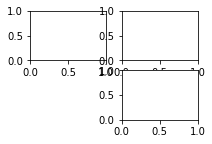

In [8]:
# add multiple axes with subplot
ax.remove()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
# skipping ax3
ax4 = fig.add_subplot(2,2,4)

# note that adding axes are ordered from left to right in a zig-zag pattern
fig

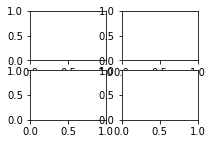

In [9]:
# do it in one go
fig, axes = plt.subplots(2,2, figsize=figsize)

type of axes is: <class 'numpy.ndarray'>, and its shape is: (2, 2)


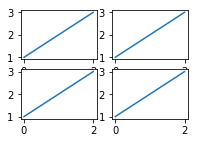

In [10]:
# from plt.subplots, you get both fig, and axes in a tuple. However, axes is compacted into an array of individual axis
print("type of axes is: {}, and its shape is: {}".format(type(axes), axes.shape))

# if you want to iterate through axes, you need to flatten it to make it 1D, otherwise you would need to do 2 for loops
axes_flatten = axes.flatten()
for ax in axes_flatten:
    ax.plot([1,2,3])
fig

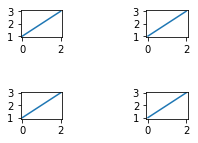

In [11]:
# not a huge fan of the spacing, so let's increase it
spacing = 2

# increasing white space between subplot widths
fig.subplots_adjust(wspace=spacing)
fig

# increasing white space bewteen subplot heights
fig.subplots_adjust(hspace=spacing)
fig

# Guide to figure and axes manipulation - _ADVANCED_

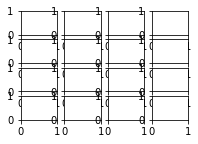

In [12]:
gridding = (4,4)
gs = gridspec.GridSpec(*gridding)
fig = plt.figure(figsize=figsize)

# note that gs represents a figure broken up into evenly separate pieces for axes to be placed into
# lets loop through each grid and show it:
for i in np.arange(gridding[0]):
    for j in np.arange(gridding[1]):
        ax = fig.add_subplot(gs[i,j])

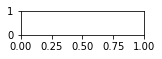

In [13]:
# you can split the grid unevenly
# reinitialize the figure
fig = plt.figure(figsize=figsize)

# lets say I want the top row, but only the first 3 columns
toprow_3columns_ax = fig.add_subplot(gs[0, 0:3]) # => this means first row (0, and first 3 columns 0:3)

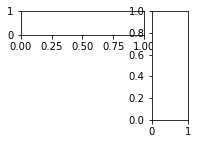

In [14]:
# now let's say I want the 4th column, and all the rows in it
allrows_4thcolumn_ax = fig.add_subplot(gs[:, 3]) # => this means all rows (:, and the 4th column 3)
fig

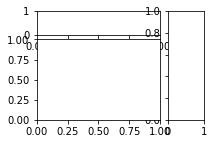

In [15]:
# now I want to fill the middle section, all of it
remaining_axes = fig.add_subplot(gs[1:4, 0:3]) # => to get the middle section, it starts at row 1 and ends at column 3
fig

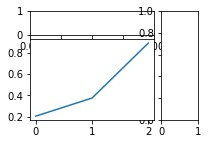

In [16]:
# the reason this is called object oriented plotting is because each axes is an individual object to work with
# I only like the middle square axes, so I will plot into it
remaining_axes.plot(np.random.rand(3))
fig

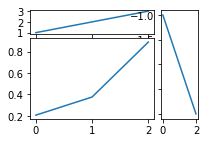

In [17]:
# just kidding, I like all the axes
toprow_3columns_ax.plot([1,2,3])
allrows_4thcolumn_ax.plot([-1,-2,-3])
fig

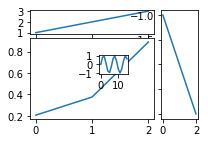

In [18]:
# you can combine gridspecing and subplotting to make other combinations of figures
middle_annoying_ax = fig.add_subplot(5,5,13) # try to visualize what a 5x5 split figure is like, and where index 13 is
middle_annoying_ax.plot(np.sin(np.arange(0,5*np.pi)))
fig

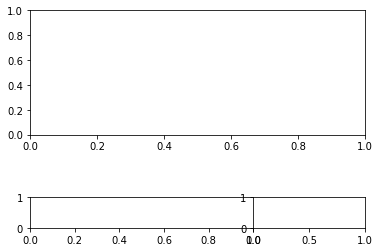

In [19]:
# playing around with spacing with gridspce
gs = gridspec.GridSpec(3, 3)

# update gs defaults to have 0 width spacing, so plots are touching left/right, and an hspace of 2
gs.update(wspace=0, hspace=2) 
ax1 = plt.subplot(gs[:-1, :])
ax2 = plt.subplot(gs[-1, :-1])
ax3 = plt.subplot(gs[-1, -1])